In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn  as sns

In [2]:
df= pd.read_csv('Country-data.csv')

In [13]:
df.shape

(167, 10)

In [3]:
df.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

Tasks:
cluster the countries based on factors (K-Means + Agglomerative)
apply PCA to visualise  the data in 2D form


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [5]:
df.describe()

child_mort     exports      health     imports         income  \
count  167.000000  167.000000  167.000000  167.000000     167.000000   
mean    38.270060   41.108976    6.815689   46.890215   17144.688623   
std     40.328931   27.412010    2.746837   24.209589   19278.067698   
min      2.600000    0.109000    1.810000    0.065900     609.000000   
25%      8.250000   23.800000    4.920000   30.200000    3355.000000   
50%     19.300000   35.000000    6.320000   43.300000    9960.000000   
75%     62.100000   51.350000    8.600000   58.750000   22800.000000   
max    208.000000  200.000000   17.900000  174.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000     167.000000  
mean     7.781832   70.555689    2.947964   12964.155689  
std     10.570704    8.893172    1.513848   18328.704809  
min     -4.210000   32.100000    1.150000     231.000000  
25%      1.810000   65.300000    1.795000    1330.000000  
50%      5.390000   73.100000    2.410000    4660.000000  
75%     10.750000   76.800000    3.880000   14050.000000  
max    104.000000   82.800000    7.490000  105000.000000

In [8]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

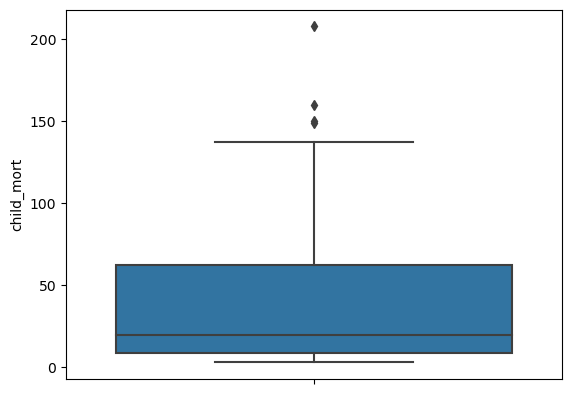

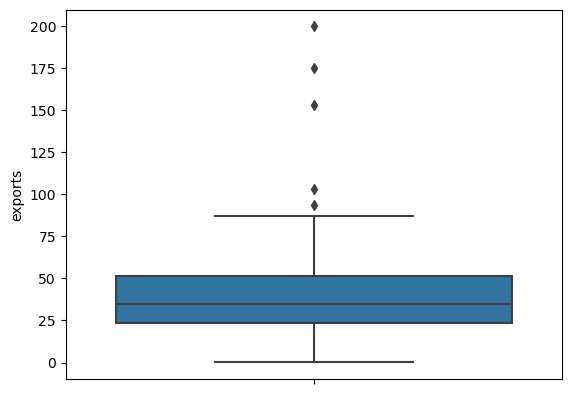

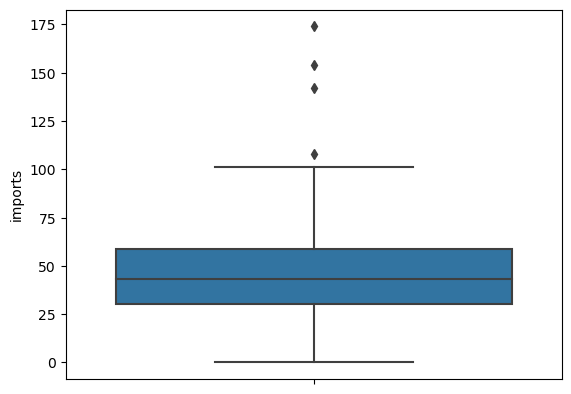

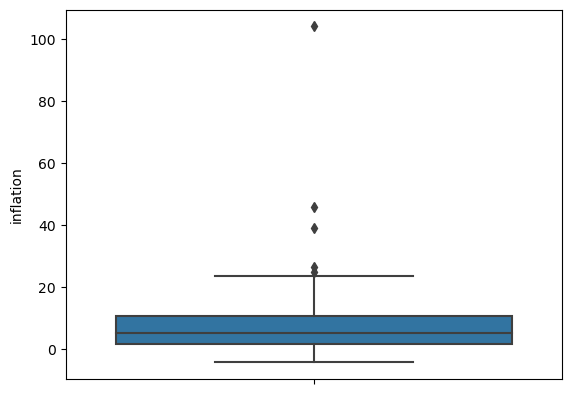

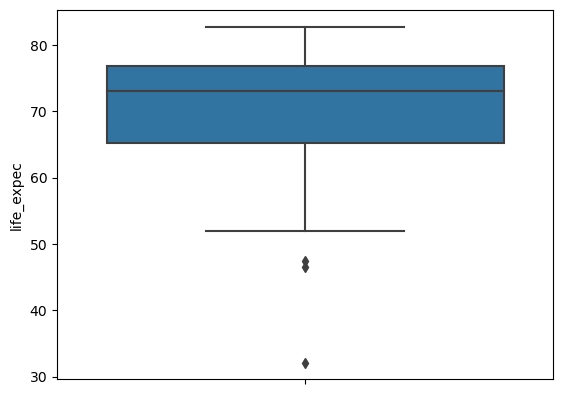

In [20]:
for i in df.columns:
    if i!='country':
        sns.boxplot(y=df[i])
        plt.show()

In [7]:
sns.heatmap(df.corr(), vmax=+1, vmin=-1, annot=True)

<AxesSubplot:>

In [22]:
df.country.nunique()

167

In [27]:
df2= df.drop('country', axis=1)
df2

child_mort  exports  health  imports  income  inflation  life_expec  \
0          90.2     10.0    7.58     44.9    1610       9.44        56.2   
1          16.6     28.0    6.55     48.6    9930       4.49        76.3   
2          27.3     38.4    4.17     31.4   12900      16.10        76.5   
3         119.0     62.3    2.85     42.9    5900      22.40        60.1   
4          10.3     45.5    6.03     58.9   19100       1.44        76.8   
..          ...      ...     ...      ...     ...        ...         ...   
162        29.2     46.6    5.25     52.7    2950       2.62        63.0   
163        17.1     28.5    4.91     17.6   16500      45.90        75.4   
164        23.3     72.0    6.84     80.2    4490      12.10        73.1   
165        56.3     30.0    5.18     34.4    4480      23.60        67.5   
166        83.1     37.0    5.89     30.9    3280      14.00        52.0   

     total_fer   gdpp  
0         5.82    553  
1         1.65   4090  
2         2.89   4460  
3         6.16   3530  
4         2.13  12200  
..         ...    ...  
162       3.50   2970  
163       2.47  13500  
164       1.95   1310  
165       4.67   1310  
166       5.40   1460  

[167 rows x 9 columns]

In [23]:
from sklearn.cluster import KMeans

In [24]:
cluster = range(2,10)

In [29]:
inertia = list()
for i in cluster:
    km = KMeans(n_clusters=i)
    km.fit(df2)
    inertia.append(km.inertia_)

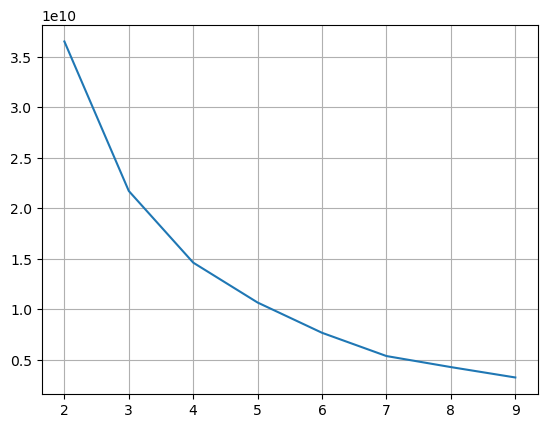

In [30]:
sns.lineplot(x=cluster, y=inertia)
plt.grid(True)
plt.show()

In [89]:
km = KMeans(n_clusters=3)
y_means = km.fit_predict(df2)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='life_expec', ylabel='gdpp'>

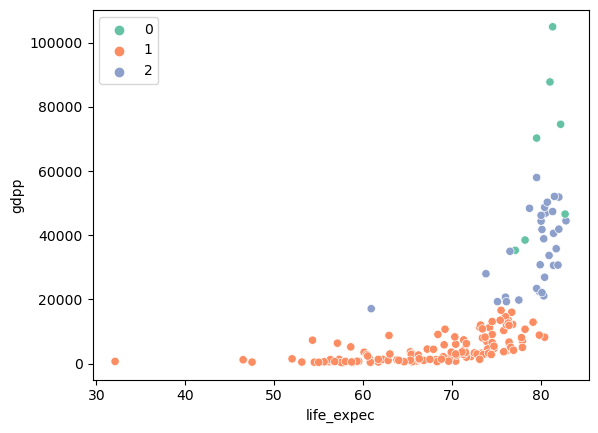

In [90]:
sns.scatterplot(df2.life_expec, df2.gdpp, hue=y_means, palette='Set2')

CEO should focus on these class-1 country where life_expec and gdp  both are low

In [82]:
#Applying PCA

In [41]:
from sklearn.decomposition import PCA

In [43]:
x = df.drop('country', axis= 1)
y = df.country

In [44]:
dim_re = PCA()
dim_re.fit(x)

PCA()

In [46]:
dim_re.explained_variance_ratio_

array([9.47923065e-01, 5.20734600e-02, 1.76794667e-06, 1.38689143e-06,
       1.90998382e-07, 1.03865256e-07, 1.82060941e-08, 5.98917170e-09,
       8.64921244e-10])

In [54]:
plt.figure(figsize=(10,5))
plt.bar(x=range(9), height=dim_re.explained_variance_ratio_.cumsum())
plt.xlabel('PCs')
plt.ylabel('Explained Variance Percentage')

Text(0, 0.5, 'Explained Variance Percentage')

In [55]:
var = dim_re.explained_variance_ratio_.cumsum()

In [60]:
var

array([0.94792307, 0.99999653, 0.99999829, 0.99999968, 0.99999987,
       0.99999997, 0.99999999, 1.        , 1.        ])

In [61]:
dim_re = PCA(n_components=2)
X_trf = dim_re.fit_transform(x)
X_trf.shape

(167, 2)

In [62]:
X_trf

array([[-1.98151280e+04, -1.65112472e+03],
       [-1.13389390e+04,  1.49346903e+03],
       [-8.92635259e+03,  3.26468410e+03],
       [-1.46524659e+04, -8.67795270e+02],
       [ 8.96142032e+02,  1.89847815e+03],
       [-6.99699306e+02,  3.00451171e+03],
       [-1.42839444e+04, -9.29672241e+01],
       [ 4.43727025e+04, -1.16354527e+04],
       [ 4.22463421e+04, -6.76525844e+03],
       [-5.72551309e+03,  4.39118182e+03],
       [ 1.45108648e+04, -6.97390702e+03],
       [ 2.27232733e+04,  1.08330393e+04],
       [-1.90710762e+04, -1.22994979e+03],
       [ 7.44735254e+02, -3.47340570e+03],
       [-5.44962091e+03,  4.39049953e+03],
       [ 3.90029276e+04, -6.39086337e+03],
       [-1.26570298e+04, -9.63440942e+01],
       [-1.95217046e+04, -1.65585861e+03],
       [-1.52018204e+04,  4.70524185e+02],
       [-1.60732239e+04, -7.79039217e+01],
       [-1.11343558e+04,  9.71315924e+02],
       [-7.33742276e+03,  2.16588186e+03],
       [-3.13382968e+03, -5.34572278e+02],
       [ 6.

plotting data after PCA with 2 component ( which is  explaining 99% of variance)

Text(0.5, 1.0, 'plot after dimensionality reduction')

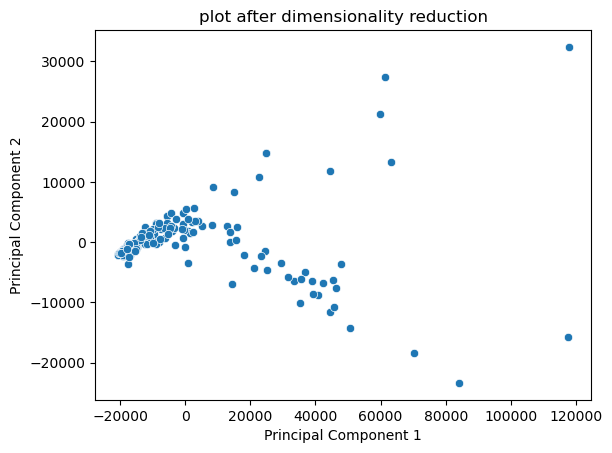

In [69]:
sns.scatterplot(x=X_trf[:,0], y=X_trf[:,1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('plot after dimensionality reduction')

In [70]:
# again applying KMeans on the reduced dimension

In [73]:
inertia = list()
for i in cluster:
    km = KMeans(n_clusters=i)
    km.fit(X_trf)
    inertia.append(km.inertia_)

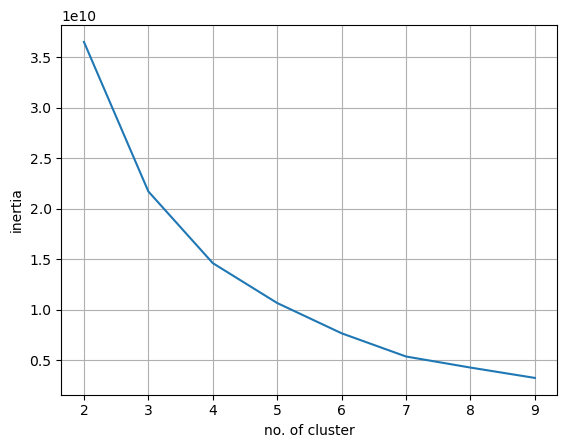

In [76]:
sns.lineplot(x=cluster, y=inertia)
plt.grid(True)
plt.xlabel('no. of cluster')
plt.ylabel('inertia')
plt.show()

 from this elbow-graph we can see,
there is sudden decrease  in inertia upto 3 clusters 

In [113]:
km = KMeans(n_clusters=3)
y_means = km.fit_predict(X_trf)

In [114]:
y_means

array([0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 2, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 1, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'KMeans after PCA')

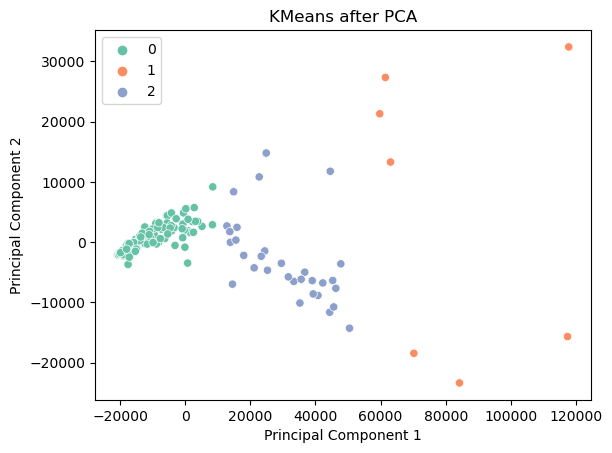

In [115]:
sns.scatterplot(X_trf[:,0], X_trf[:,1], hue=y_means, palette='Set2')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KMeans after PCA')

In [94]:
#applying Hierarchical clustering
df.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

In [96]:
df3= df[['life_expec','gdpp']]

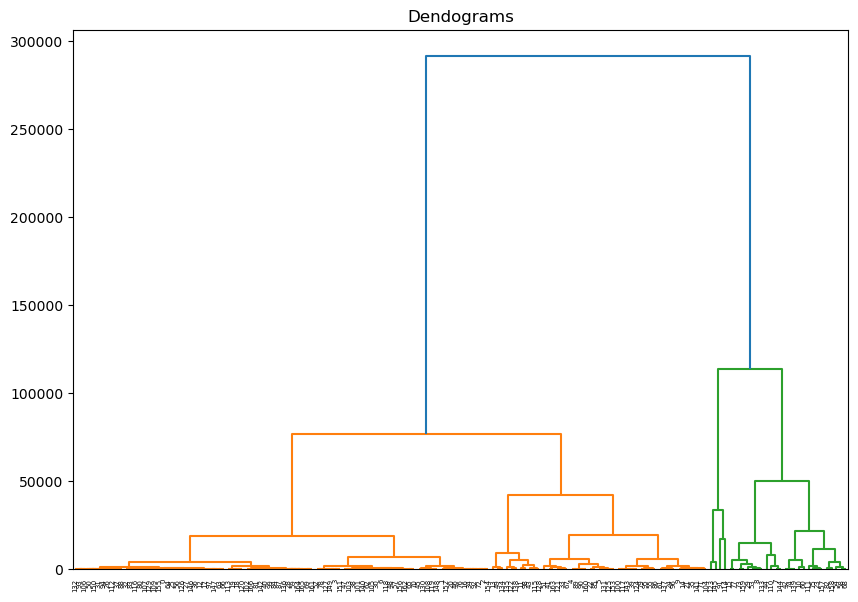

In [97]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,7))
plt.title('Dendograms')
dend = shc.dendrogram(shc.linkage(df3, method='ward'))

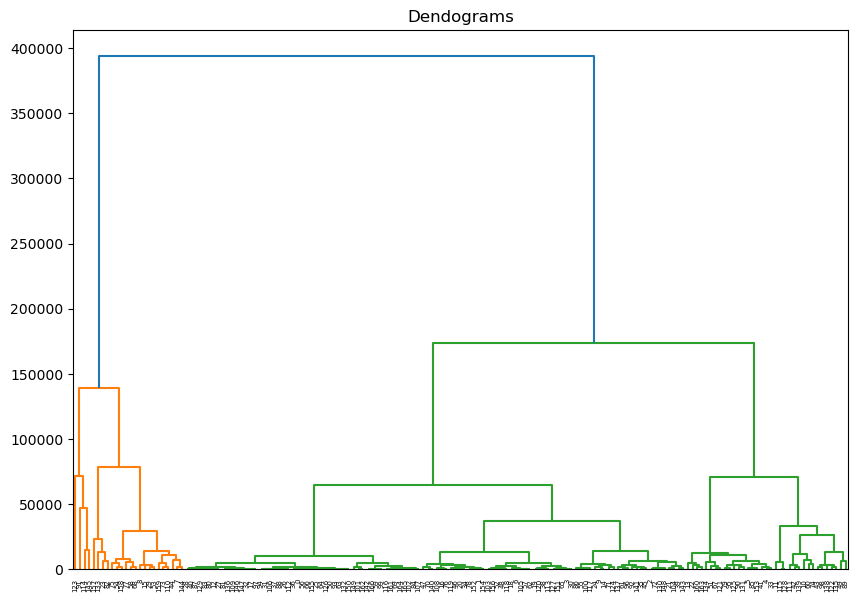

In [93]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,7))
plt.title('Dendograms')
dend = shc.dendrogram(shc.linkage(X_trf, method='ward'))

In [98]:
from sklearn.cluster import AgglomerativeClustering

In [125]:
agc = AgglomerativeClustering(n_clusters=3,linkage='ward')

In [126]:
cluster_labels = agc.fit_predict(X_trf)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Agglomerative Clustering after PCA')

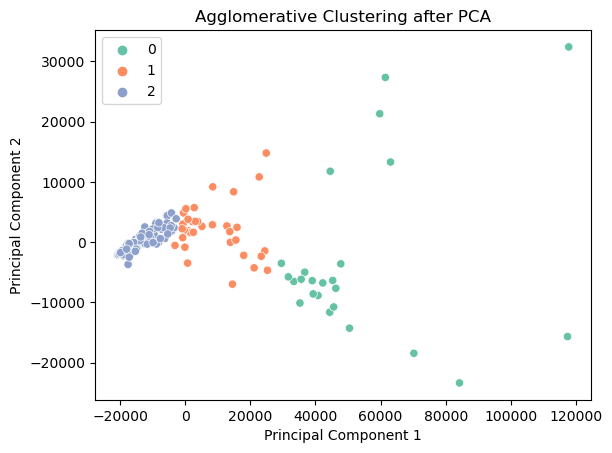

In [127]:
sns.scatterplot(X_trf[:,0], X_trf[:,1], hue=cluster_labels, palette='Set2')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Agglomerative Clustering after PCA')